CUSTOMER CHURN
PREDICTION:
Develop a model to predict customer churn for a subscription based service or business. Use historical customer data, including
features like usage behavior and customer demographics, and try
algorithms like Logistic Regression, Random Forests, or Gradient
Boosting to predict churn.


Qasim Hasan


ML TASK 3: CUSTOMER CHURN PREDICTION

CodSoft Internship Project Assignment @CodSoft

https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction        Downloaded csv file from this link provided

1. Importing Libraries

In [5]:
#Libraries that will be used in this Project ML: Customer_Churn_Prediction

 # Operating System library for interacting with the operating system
import os  #learned as i was putting dataset in wrong folder

# Pandas library for data manipulation
import pandas as pd

# Machine learning models for classification and regression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

 # Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Logistic Regression model for classification
from sklearn.linear_model import LogisticRegression

 # Standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

 # Metrics for evaluating model performance
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Matplotlib library for creating visualizations
import matplotlib.pyplot as plt
%matplotlib inline

  # Seaborn library for statistical data visualization
import seaborn as sns

2 Accessing the Dataset Downloaded

In [6]:
# Print the part of the folder i am currently in so i have uploaded my dataset here i.e the /content/Churn_Modelling.csv
print(os.getcwd())

/content


In [7]:
#Reading the dataset for this project
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


3. Data Analysis

In [8]:
#seeing top 10 rows in the dataset
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


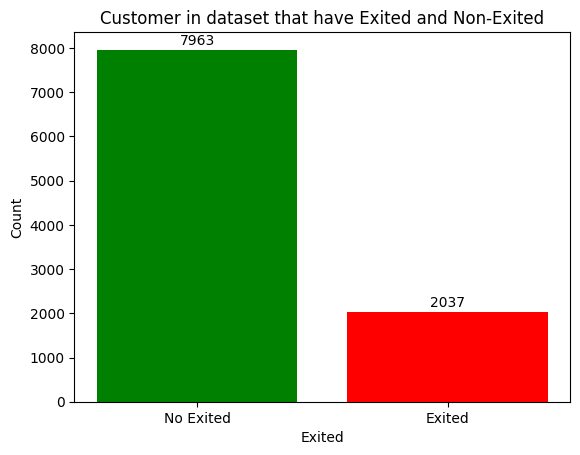

In [9]:
counts = dataset['Exited'].value_counts()
labels = ['No Exited', 'Exited']

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Customer in dataset that have Exited and Non-Exited')

# A neat trick learned from the internet to print the value at the top of the bar graph
for i, v in enumerate(counts):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', color='black')

plt.show()

#so we can see its like 80% no exited and 20% exited

In [10]:
dataset.shape
#simply want to know how many rows and columns there are in the dataset

(10000, 14)

In [11]:
#Looking at the available columns that are in dataset
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
# Including only Potential Predictors as independent varibles
# Rownumber customerId and Surname are not included as they are can't be used for prediction like other columns
data_set = dataset[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [13]:
print(data_set.isnull().sum()) # this save a lot of headache before starting preprocessing to fill the data gap

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [14]:
#Looked this up because further dwn i was having  problem
# Converting the categorical variables into numerical and avoiding Dummy Variable Trap
data_set = pd.get_dummies(data_set, drop_first=True)

4. Feature Correlation

<Axes: >

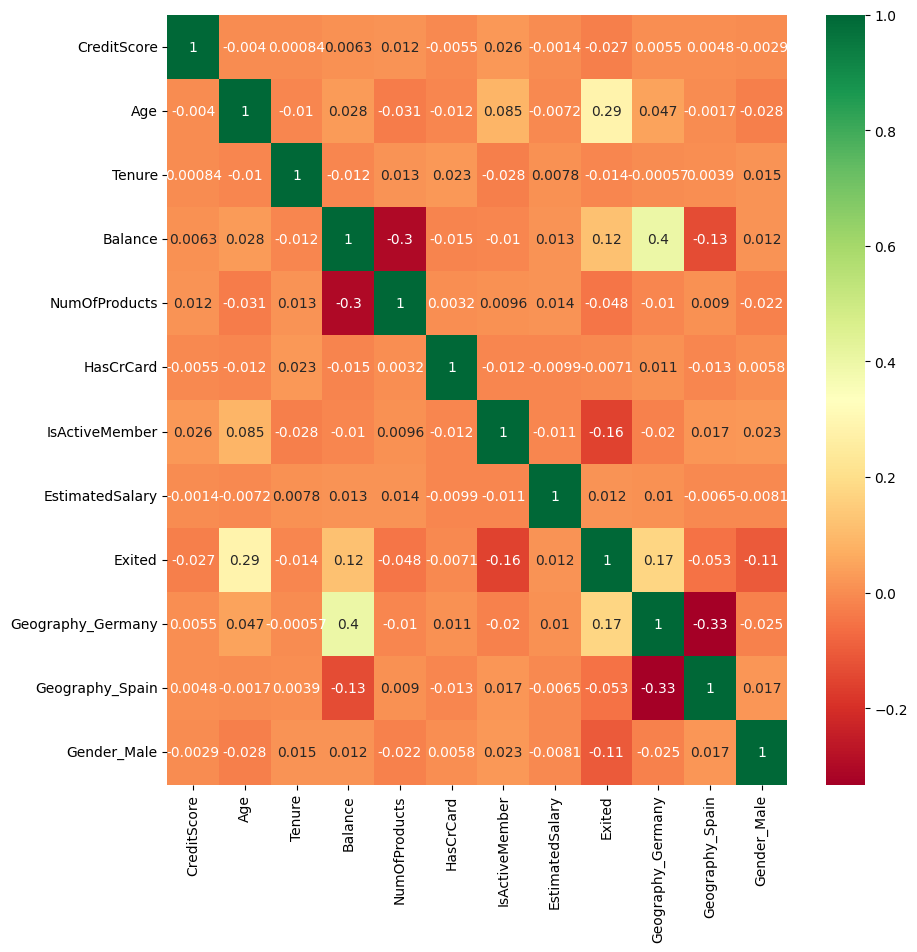

In [15]:
# The correlation matrix is a table showing the correlation coefficients between variables in the dataset
# i learned this through youtube search it very usefull
corrmat = data_set.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
sns.heatmap(data_set [top_corr_features].corr(), annot=True, cmap='RdYlGn')

Splitting data into dependent and independent varaiable

In [16]:
# Splitting the Dataset into Dependent and Independent Variables
X = data_set.iloc[:, [0,1,2,3,4,5,6,7,9,10,11]]
y = data_set.iloc[:, 8].values

In [17]:
#All independednt variable that
X.head(12)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1


In [18]:
#this is now showing the exited column which we want to predict so this dependent varibale as it is dependent
print(y)

[1 0 1 ... 1 1 0]


5. Splitting data into Test and Train

In [19]:
#Splitting data into training and  testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [20]:
#After this preprocessing step both X_train and X_test will be standardized with each feature having a mean of 0 and a standard deviation of 1.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
print(X_train)

[[ 0.35649971 -0.6557859   0.34567966 ... -0.57946723 -0.57638802
   0.91324755]
 [-0.20389777  0.29493847 -0.3483691  ...  1.72572313 -0.57638802
   0.91324755]
 [-0.96147213 -1.41636539 -0.69539349 ... -0.57946723  1.73494238
   0.91324755]
 ...
 [ 0.86500853 -0.08535128 -1.38944225 ... -0.57946723 -0.57638802
  -1.09499335]
 [ 0.15932282  0.3900109   1.03972843 ... -0.57946723 -0.57638802
   0.91324755]
 [ 0.47065475  1.15059039 -1.38944225 ...  1.72572313 -0.57638802
   0.91324755]]


6. Models:

In [22]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(rf_accuracy)

0.8685


In [23]:
mat = confusion_matrix(y_test,rf_pred)
print(mat)

[[1547   60]
 [ 203  190]]


True Positive (TP): The model correctly predicted that a customer would churn (positive class).
False Positive (FP): The model incorrectly predicted that a customer would churn when they did not actually churn
False Negative (FN): The model incorrectly predicted that a customer would not churn when they actually did churn
True Negative (TN): The model correctly predicted that a customer would not churn (negative class).


In [24]:
# ALSO SHOWING two other models that can be applied as well

# Train Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)


Logistic Regression Accuracy: 0.811


In [25]:
mat = confusion_matrix(y_test,lr_pred)
print(mat)

[[1543   64]
 [ 314   79]]


In [26]:
# Train Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)

mat = confusion_matrix(y_test,gb_pred)
print(mat)

Gradient Boosting Accuracy: 0.8675
[[1543   64]
 [ 201  192]]


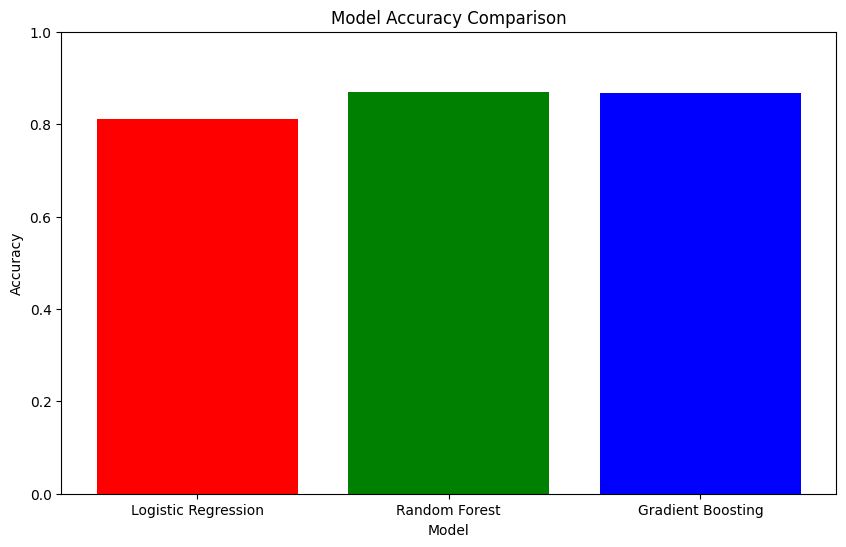

In [27]:
# Example accuracy scores
accuracy_scores = {
    'Logistic Regression': lr_accuracy,
    'Random Forest': rf_accuracy,
    'Gradient Boosting': gb_accuracy
}

# List of colors for each model
colors = ['red', 'green', 'blue']

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.0, 1.0)
plt.show()

In [28]:
# Determine the best performing model
best_model = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model]

print("Best performing model:", best_model)
print("Accuracy:", best_accuracy)


Best performing model: Random Forest
Accuracy: 0.8685
